In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import math

# Define a custom colorblind friendly colormap
custom_cmap = [
    '#e69f00',   
    '#0072b2',
    '#56b4e9',
    '#cc79a7', 
    '#f0e442', 
    '#009e73', 
    '#000000'
]
plt.rcParams["axes.prop_cycle"] = cycler(color=custom_cmap)
plt.rcParams['axes.axisbelow'] = True

# Seed random generator for reproducibility
rng = np.random.default_rng(42)

# Set n samples we want
n_samples = 256

# Generate data
weights_m = rng.normal(80, 10, n_samples//2)
weights_f = rng.normal(65, 10, n_samples//2)

heights_m = weights_m + rng.normal(100, 20, n_samples//2)
heights_f = weights_f + rng.normal(90, 10, n_samples//2)

#is_male = np.ones(n_samples, dtype=np.int8)
#is_male[n_samples//2:]-=1

# Create dataframe from data
df_w2h = pd.DataFrame({"height": np.concatenate([heights_m, heights_f]), 
                       "weight": np.concatenate([weights_m, weights_f])})
df_w2h = df_w2h[~df_w2h['weight'].between(75, 80, inclusive='left')]
new_row = pd.DataFrame({'height': [130, 220], 'weight': [75.1, 79.9]})
df_w2h = pd.concat([df_w2h, new_row], ignore_index=True)
print(df_w2h.head())

       height     weight
0  191.742492  83.047171
1  162.077038  69.600159
2  184.828053  87.504512
3  161.907731  89.405647
4  155.726173  60.489648


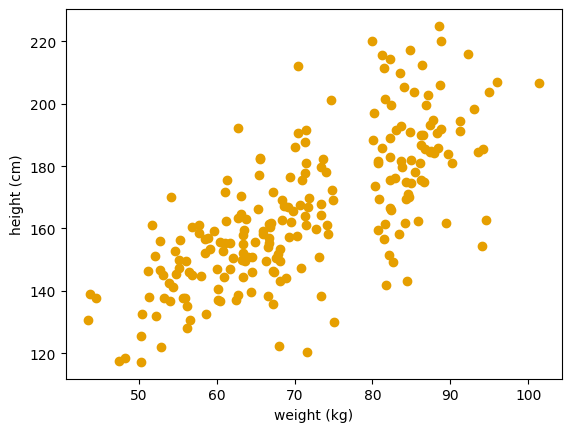

In [2]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height)
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/weight_height_dataset.png")
plt.show()

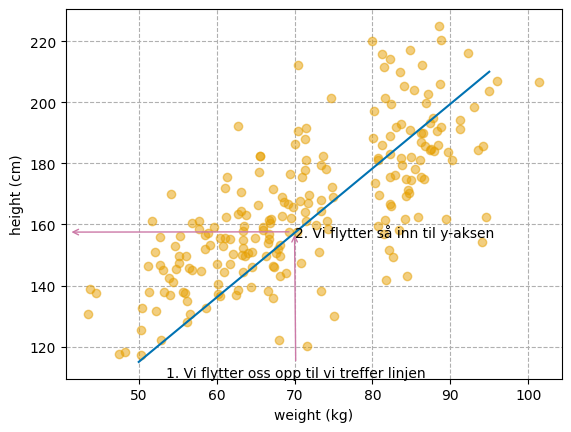

In [3]:
plt.figure()
plt.grid(linestyle='--')
plt.scatter(df_w2h.weight, df_w2h.height, alpha=0.5)
plt.annotate('1. Vi flytter oss opp til vi treffer linjen', xy=(70, 157.5), xytext=(53.5, 110), arrowprops=dict(facecolor='yellow',ec = custom_cmap[3], arrowstyle='->'))
plt.annotate('2. Vi flytter så inn til y-aksen', xy=(41, 157.5), xytext=(70, 156), arrowprops=dict(facecolor='yellow',ec = custom_cmap[3], arrowstyle='->'))
#plt.vlines(70, ymin=110, ymax=157.5, color=custom_cmap[5])
#plt.hlines(157.5, xmin=45, xmax=70, color=custom_cmap[5])
plt.plot([50, 95], [115, 210], color=custom_cmap[1])
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/finding_y.png")
plt.show()

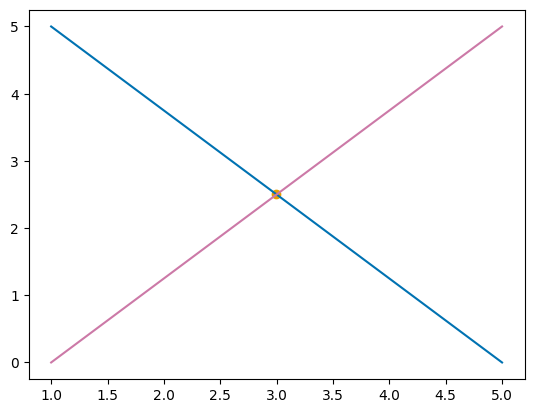

In [4]:
plt.plot([1, 5], [5, 0], color=custom_cmap[1])
plt.plot([1, 5], [0, 5], color=custom_cmap[3])
plt.scatter(2.991, 2.5)

plt.savefig("figs/two_lines.png")
plt.show()

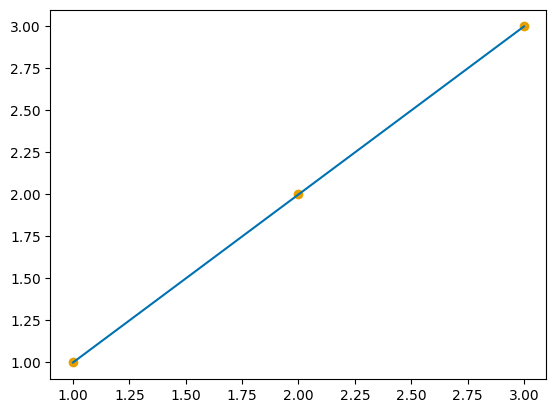

In [5]:
plt.plot([1, 2, 3], [1, 2, 3], color=custom_cmap[1])
plt.scatter([1,2,3],[1,2,3])
plt.savefig("figs/three_linear_points.png")
plt.show()

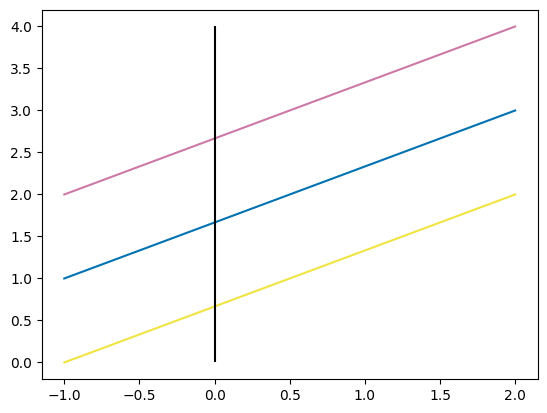

In [6]:
plt.plot([-1, 2], [1, 3], color=custom_cmap[1])
plt.plot([-1, 2], [2, 4], color=custom_cmap[3])
plt.plot([-1, 2], [0, 2], color=custom_cmap[4])
plt.vlines(0, ymin=0, ymax=4, color='black')
plt.savefig("figs/three_lines_same_a.png")
plt.show()

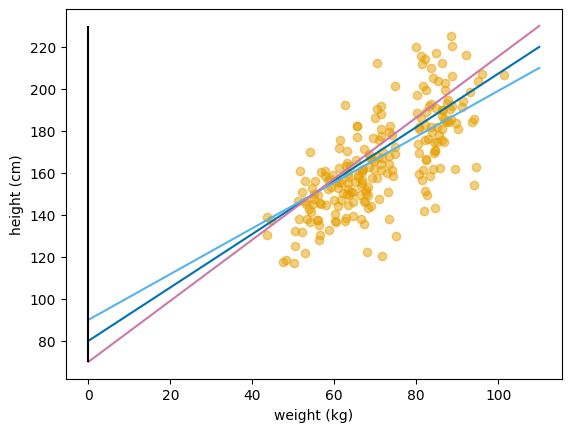

In [7]:
plt.figure()
plt.scatter(df_w2h.weight, df_w2h.height, alpha=0.5)
plt.plot([0, 110], [80, 220], color=custom_cmap[1])
plt.plot([0, 110], [90, 210], color=custom_cmap[2])
plt.plot([0, 110], [70, 230], color=custom_cmap[3])
plt.vlines(0, ymin=70, ymax=230, color='black')
plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.savefig("figs/three_lines.png")
plt.show()

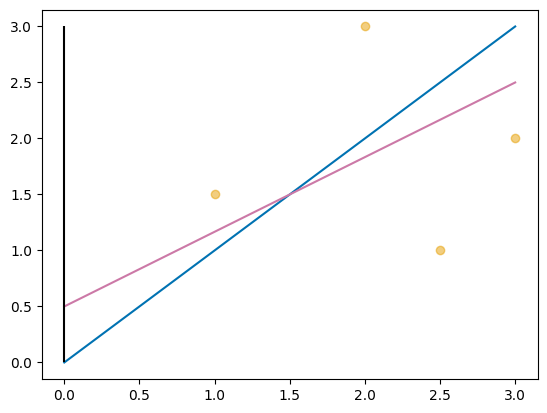

In [8]:
plt.figure()
points_x = [1, 2, 2.5, 3]
points_y = [1.5, 3, 1, 2]
plt.scatter(points_x, points_y, color=custom_cmap[0], alpha=0.5)
plt.plot([0, 3], [0, 3], color=custom_cmap[1])
plt.plot([0, 3], [0.5, 2.5], color=custom_cmap[3])
plt.annotate('1. Vi flytter oss opp til vi treffer linjen', xy=(70, 157.5), xytext=(53.5, 110), arrowprops=dict(facecolor='yellow',ec = custom_cmap[3], arrowstyle='->'))

plt.vlines(0, ymin=0, ymax=3, color='black')

In [9]:
def distance_from_point_to_line(point_x, point_y, line_a, line_b):
    line_y = line_a*point_x + line_b
    return point_y - line_y

In [14]:
distances_line_1 = [] 
distances_line_2 = [] 
for i,_ in enumerate(points_x):
    distances_line_1.append(distance_from_point_to_line(points_x[i], points_y[i], 1, 0))
    distances_line_2.append(distance_from_point_to_line(points_x[i], points_y[i], 0.666666, 0.5))
    

In [16]:
distances_line_1

[0.5, 1, -1.5, -1]